<a href="https://colab.research.google.com/github/SaketMunda/cnn-computer-vision-introduction/blob/master/convolutional_neural_network_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow
Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/dansbecker/food-101

However we've modified it to only use two classes(pizza & steak) using the image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

> **Note:** We start with a smaller dataset so we can experiment quickly and figure what works (or beter yet what doesn't work) before scaling up.

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# unzip the zip file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-11-10 04:12:10--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.145.128, 74.125.143.128, 173.194.69.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.145.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  34.1MB/s    in 3.1s    

2022-11-10 04:12:13 (34.1 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project... this usually means visualizing many samples of your data.

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/test

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

There we go, we have all the images of steak and pizza available in their directory which represents our class names.

In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualize our images, first let's get the class names programmatically.

In [ ]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [ ]:
# Let's visualize the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image Shape: {img.shape}") # Show the shape of the image

  return img

['1717790.jpg']
Image Shape: (512, 512, 3)


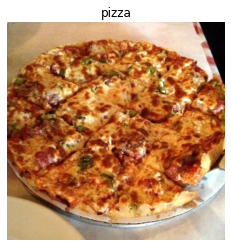

In [ ]:
# view a random image from the training dataset
img = view_random_image(target_dir='pizza_steak/train/',
                        target_class='pizza')

In [ ]:
img.shape

(384, 512, 3)

It says, that height of the image is 384, width is 512 and 3 color channels (RGB)

In [ ]:
# view the image
img

array([[[132, 145, 125],
        [137, 154, 135],
        [143, 168, 149],
        ...,
        [  2,   0,   1],
        [  2,   0,   1],
        [  2,   0,   1]],

       [[126, 143, 125],
        [132, 153, 136],
        [141, 169, 154],
        ...,
        [  2,   0,   1],
        [  2,   0,   1],
        [  2,   0,   1]],

       [[128, 152, 139],
        [133, 159, 148],
        [138, 171, 160],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       ...,

       [[139, 189, 196],
        [138, 188, 195],
        [136, 189, 195],
        ...,
        [136, 155, 135],
        [135, 153, 131],
        [132, 150, 128]],

       [[140, 190, 197],
        [139, 189, 196],
        [138, 188, 195],
        ...,
        [130, 149, 129],
        [130, 149, 129],
        [127, 146, 124]],

       [[140, 189, 196],
        [138, 188, 195],
        [137, 187, 194],
        ...,
        [122, 141, 121],
        [124, 143, 123],
        [122, 141, 119]]

It seems the image is now converted to array of numbers with random numbers, but if every vector(row) represents pixel, then each pixel has it's own RGB value, therefor, each number would range between 0~255.

In [ ]:
# The images we've imported and plotted are actually giant arrays/tensors of different pixel values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[132, 145, 125],
        [137, 154, 135],
        [143, 168, 149],
        ...,
        [  2,   0,   1],
        [  2,   0,   1],
        [  2,   0,   1]],

       [[126, 143, 125],
        [132, 153, 136],
        [141, 169, 154],
        ...,
        [  2,   0,   1],
        [  2,   0,   1],
        [  2,   0,   1]],

       [[128, 152, 139],
        [133, 159, 148],
        [138, 171, 160],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       ...,

       [[139, 189, 196],
        [138, 188, 195],
        [136, 189, 195],
        ...,
        [136, 155, 135],
        [135, 153, 131],
        [132, 150, 128]],

       [[140, 190, 197],
        [139, 189, 196],
        [138, 188, 195],
        ...,
        [130, 149, 129],
        [130, 149, 129],
        [127, 146, 124]],

       [[140, 189, 196],
        [138, 188, 195],
        [137, 187, 194],
        ...,
        [122, 141, 12

> **Note:** As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also referred to as **normalize**) their pixel values by dividing the image arrays by 255. (since 255 is the maximum pixel value)

In [ ]:
# Get all the pixel values between 0 & 1 (scale/normalize the data, as neural networks love values between 0 & 1)
img / 255

array([[[0.51764706, 0.56862745, 0.49019608],
        [0.5372549 , 0.60392157, 0.52941176],
        [0.56078431, 0.65882353, 0.58431373],
        ...,
        [0.00784314, 0.        , 0.00392157],
        [0.00784314, 0.        , 0.00392157],
        [0.00784314, 0.        , 0.00392157]],

       [[0.49411765, 0.56078431, 0.49019608],
        [0.51764706, 0.6       , 0.53333333],
        [0.55294118, 0.6627451 , 0.60392157],
        ...,
        [0.00784314, 0.        , 0.00392157],
        [0.00784314, 0.        , 0.00392157],
        [0.00784314, 0.        , 0.00392157]],

       [[0.50196078, 0.59607843, 0.54509804],
        [0.52156863, 0.62352941, 0.58039216],
        [0.54117647, 0.67058824, 0.62745098],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       ...,

       [[0.54509804, 0.74117647, 0.76862745],
        [0.54117647, 0.7372549 , 0.76470588],
        [0.53333333, 0

## An end-to-end example

We've checked out our data and found there's 750 training images, as well as 250 test images per class and they're all of various different shapes.

It's time to jump straight in the deep mind.

Reading the [original dataset authors paper](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/static/bossard_eccv14_food-101.pdf), we see they used a [Random Forest machine learning model](https://medium.com/@williamkoehrsen/random-forest-simple-explanation-377895a60d2d) and averaged 50.76% accuracy at predicting what different foods different images had in them.

From now on, that 50.76% will be our baseline.

> 🔑 **Note**: A **baseline** is a score or evaluation metric you want to try and beat. Usually you'll start with a simple model, create a baseline and try to beat it by increasing the complexity of the model. A really fun way to learn machine learning is to find some kind of modelling paper with a published result and try to beat it.

The code in the following cell replicates and end-to-end way to model our `pizza_steak` dataset with a convolutional neural network (CNN) using the components listed above.

For reference, the model we're using replicates TinyVGG, the computer vision architecture which fuels the [CNN explainer webpage](https://poloclub.github.io/cnn-explainer/)

> 📖 **Resource**: The architecture we're using below is a scaled-down version of [VGG-16](https://arxiv.org/abs/1505.06798), a convolutional neural network which came 2nd in the 2014 [ImageNet classification competition](http://image-net.org/)

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(17)

# Preprocess the data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224,224), # convert all images to be 224 x 224
                                               class_mode='binary', # type of problem we're working on
                                               seed=17)
valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=17)

# Create a CNN model (same as Tiny VGG)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3, # can also be (3,3)
                           activation='relu',
                           input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, color channels)
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2,2)
                              padding='valid'), # padding can also be 'same'
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid') # binary activation output
])

# Compile the model
model_1.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

# fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 21s 258ms/step - loss: 0.6371 - accuracy: 0.6693 - val_loss: 0.5209 - val_accuracy: 0.7460
Epoch 2/5
47/47 [==============================] - 9s 195ms/step - loss: 0.4926 - accuracy: 0.7780 - val_loss: 0.4047 - val_accuracy: 0.8120
Epoch 3/5
47/47 [==============================] - 9s 196ms/step - loss: 0.4471 - accuracy: 0.7973 - val_loss: 0.4187 - val_accuracy: 0.8160
Epoch 4/5
47/47 [==============================] - 9s 194ms/step - loss: 0.4423 - accuracy: 0.8060 - val_loss: 0.3940 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 9s 195ms/step - loss: 0.3909 - accuracy: 0.8307 - val_loss: 0.4041 - val_accuracy: 0.8220


Nice ! After 5 epochs, our model beat the baseline score of 50.76% accuracy (our model got ~86% accuracy on the training set and ~85% accuracy on the test set).

However, our model only went through a binary classification problem rather than all of the 101 classes in the Food101 dataset, so we can't directly compare these metrics. That being said, the results so far show that our model is learning something.